## Emotion Prediction from Social Media Patterns ##

In [ ]:
pip install pandas

In [ ]:
pip install numpy


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

In [ ]:
pip install plotly.express

In [ ]:
pip install imbalanced-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Exploratory Data Analysis (EDA)

In [3]:
# Load the datasets
train_df = pd.read_csv('train.csv', on_bad_lines='skip')
test_df = pd.read_csv('test.csv', on_bad_lines='skip')
val_df = pd.read_csv('val.csv', on_bad_lines='skip')

# Display the first few rows of the training data
print("First 5 rows of the training data:")
print(train_df.head())

# Display basic information about the datasets
print("Training Data Info:")
print(train_df.info())
print("Test Data Info:")
print(test_df.info())
print("Validation Data Info:")
print(val_df.info())

# Display descriptive statistics for the training data
print("Training Data Descriptive Statistics:")
print(train_df.describe())

First 5 rows of the training data:
  User_ID  Age  Gender   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0     NaN  NaN     NaN        NaN                         NaN            NaN   
1       1   25  Female  Instagram                       120.0            3.0   
2     NaN  NaN     NaN        NaN                         NaN            NaN   
3       2   30    Male    Twitter                        90.0            5.0   
4     NaN  NaN     NaN        NaN                         NaN            NaN   

   Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                     NaN                        NaN                    NaN   
1                    45.0                       10.0                   12.0   
2                     NaN                        NaN                    NaN   
3                    20.0                       25.0                   30.0   
4                     NaN                        NaN                    NaN   

  Dominan

In [5]:
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())

print("Missing values in testing data:")
print(test_df.isnull().sum())

print("Missing values in validating data:")
print(val_df.isnull().sum())

Missing values in training data:
User_ID                       1003
Age                           1003
Gender                        1004
Platform                      1004
Daily_Usage_Time (minutes)    1004
Posts_Per_Day                 1004
Likes_Received_Per_Day        1004
Comments_Received_Per_Day     1004
Messages_Sent_Per_Day         1004
Dominant_Emotion              1004
dtype: int64
Missing values in testing data:
User_ID                       103
Age                           103
Gender                        103
Platform                      103
Daily_Usage_Time (minutes)    103
Posts_Per_Day                 103
Likes_Received_Per_Day        103
Comments_Received_Per_Day     103
Messages_Sent_Per_Day         103
Dominant_Emotion              103
dtype: int64
Missing values in validating data:
User_ID                       148
Age                           148
Gender                        148
Platform                      148
Daily_Usage_Time (minutes)    148
Posts_Per_Day 

In [6]:
train_df.dropna(inplace=True)
val_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [7]:
# Check for missing values
print("Missing values in training data:")
print(train_df.isnull().sum())

print("Missing values in testing data:")
print(test_df.isnull().sum())

print("Missing values in validating data:")
print(val_df.isnull().sum())

Missing values in training data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64
Missing values in testing data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64
Missing values in validating data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_R

Data Visualization (distribution of age)

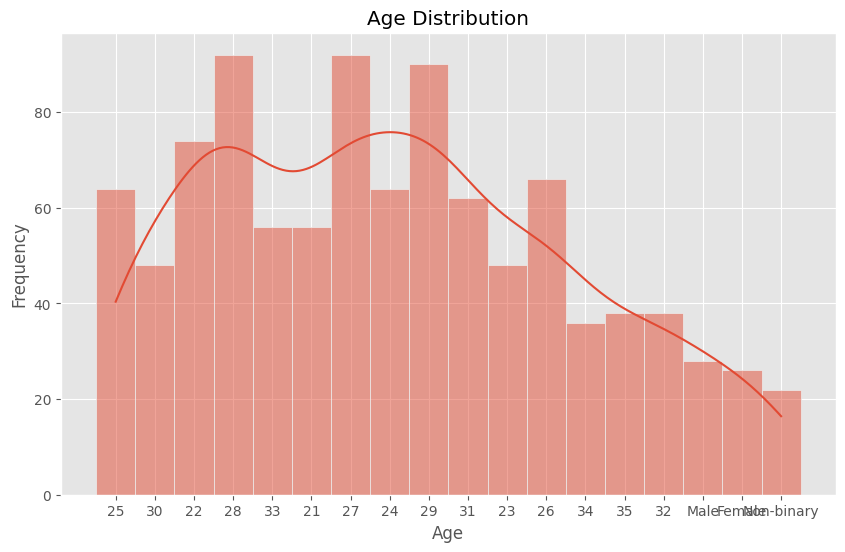

In [8]:
# Visualize the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

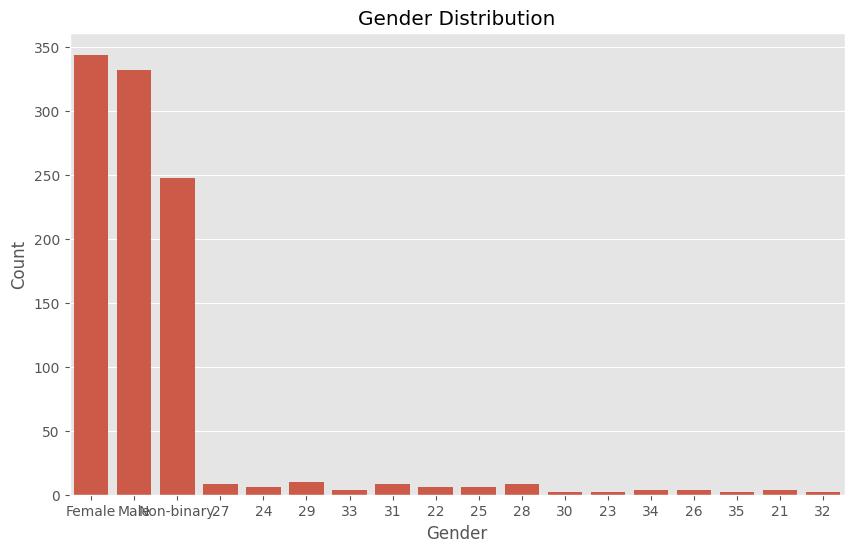

In [9]:
# Visualize the gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Columns in the training data:
Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


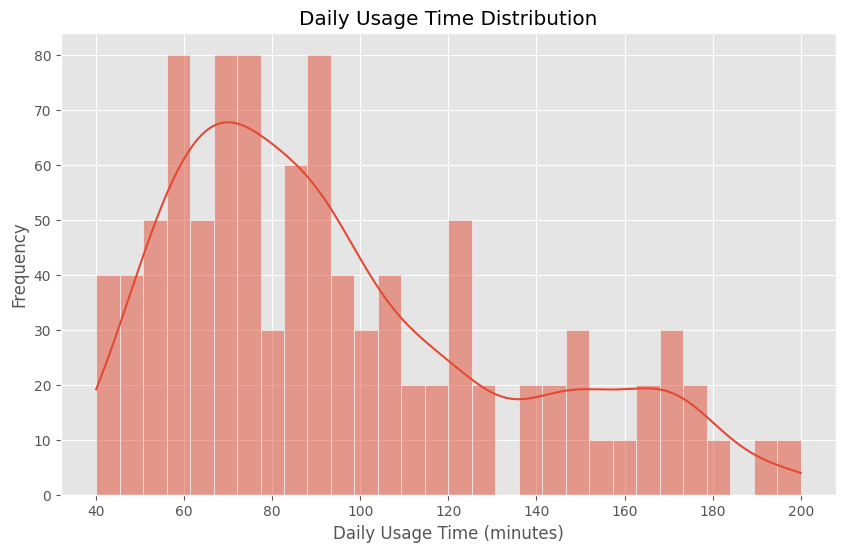

In [11]:
# Print the column names to verify their correctness
print("Columns in the training data:")
print(train_df.columns)

# If the column name is 'Daily_Usage_Time (minutes)', we need to rename it for consistency
if 'Daily_Usage_Time (minutes)' in train_df.columns:
    train_df.rename(columns={'Daily_Usage_Time (minutes)': 'Daily_Usage_Time'}, inplace=True)

# Visualize the distribution of daily usage time
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Daily_Usage_Time'], kde=True, bins=30)
plt.title('Daily Usage Time Distribution')
plt.xlabel('Daily Usage Time (minutes)')
plt.ylabel('Frequency')
plt.show()


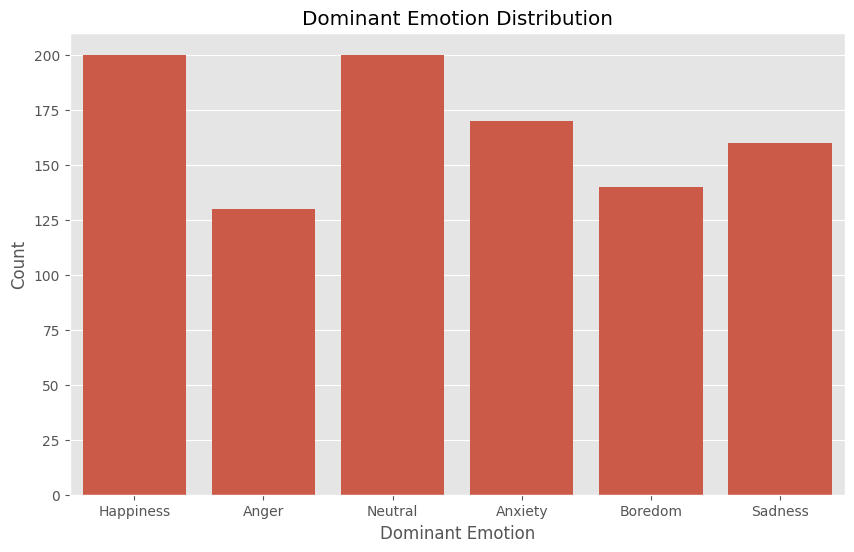

In [12]:
# Visualize the dominant emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Dominant_Emotion')
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

In [13]:
# removing the Male, Female, Non-binary, and işte mevcut veri kümesini 1000 satıra tamamlıyorum:

# Replace non-numeric values with NaN
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# Handle NaN values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

In [18]:
pip install plotly 


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly


In [19]:
import plotly.express as px

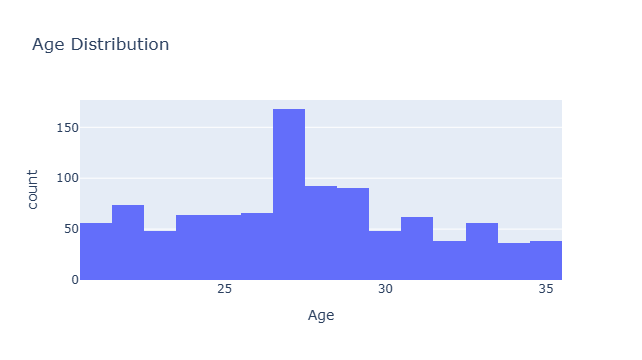

In [20]:
plt = px.histogram(train_df, x='Age', title='Age Distribution')
plt.show()

In [21]:
train_df['Platform'].value_counts()

Platform
Instagram    250
Twitter      200
Facebook     190
LinkedIn     120
Whatsapp      80
Telegram      80
Snapchat      80
Name: count, dtype: int64

In [22]:
# filling with mode
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

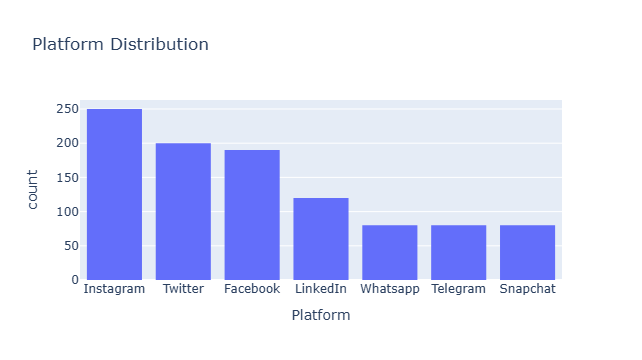

In [23]:
plt = px.histogram(train_df, x='Platform', title='Platform Distribution')
plt.show()

In [27]:
# filling with mode
train_df['Platform'].fillna(train_df['Platform'].mode()[0], inplace=True)

In [28]:
train_df['Platform'].unique()

array(['Instagram', 'Twitter', 'Facebook', 'LinkedIn', 'Whatsapp',
       'Telegram', 'Snapchat'], dtype=object)

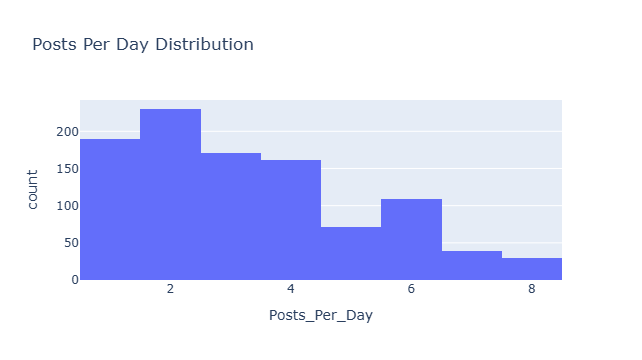

In [29]:
plt = px.histogram(train_df, x='Posts_Per_Day', title='Posts Per Day Distribution')
plt.show()

In [31]:
# filling wih mode
train_df['Likes_Received_Per_Day'].fillna(train_df['Likes_Received_Per_Day'].mode()[0], inplace=True)

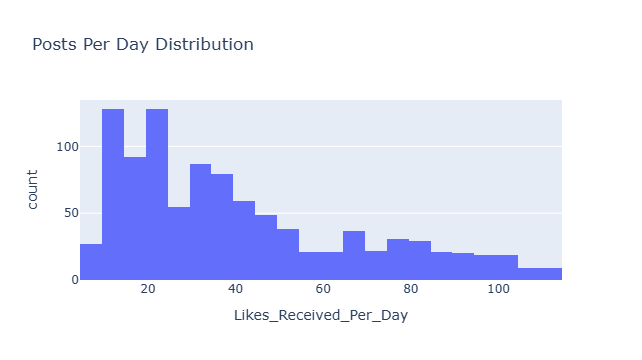

In [32]:
plt = px.histogram(train_df, x='Likes_Received_Per_Day', title='Posts Per Day Distribution')
plt.show()

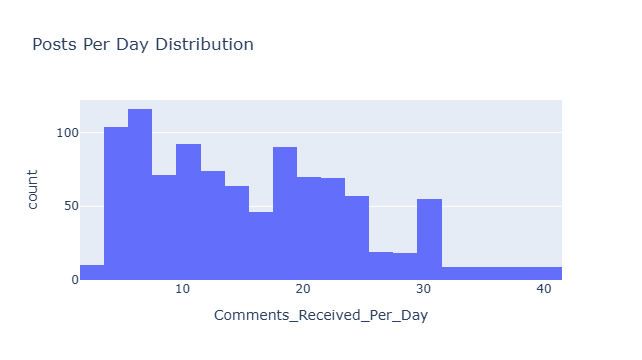

In [33]:
plt = px.histogram(train_df, x='Comments_Received_Per_Day', title='Posts Per Day Distribution')
plt.show()

In [34]:
train_df['Dominant_Emotion'].unique()

array(['Happiness', 'Anger', 'Neutral', 'Anxiety', 'Boredom', 'Sadness'],
      dtype=object)

In [35]:
# fill with mode
train_df['Dominant_Emotion'].fillna(train_df['Dominant_Emotion'].mode()[0], inplace=True)

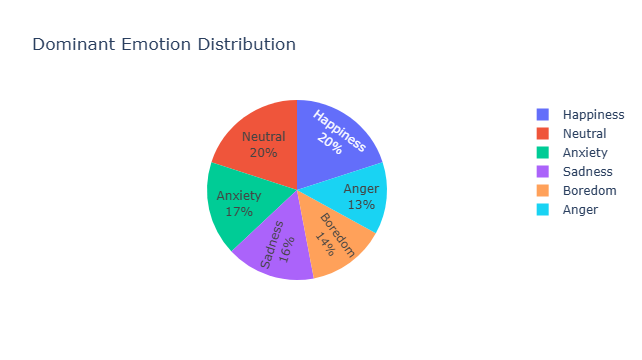

In [36]:
plt = px.pie(train_df, names='Dominant_Emotion', title='Dominant Emotion Distribution')
# adding the values to the pie section
plt.update_traces(textposition='inside', textinfo='percent+label')
plt.show()

In [37]:
# Group the data by gender and platform
grouped = train_df.groupby(['Gender', 'Platform'])

# Count the number of rows in each group
counts = grouped.size()

# Print the counts
print(counts)

Gender      Platform 
21          Facebook       2
            Snapchat       2
22          Snapchat       2
            Twitter        2
            Whatsapp       2
23          Whatsapp       2
24          Instagram      2
            Snapchat       2
            Twitter        2
25          Telegram       4
            Twitter        2
26          Snapchat       2
            Twitter        2
27          Facebook       2
            Instagram      2
            Telegram       2
            Whatsapp       2
28          Instagram      2
            Snapchat       2
            Twitter        2
            Whatsapp       2
29          Facebook       6
            Snapchat       2
            Whatsapp       2
30          Instagram      2
31          LinkedIn       2
            Telegram       4
            Whatsapp       2
32          Instagram      2
33          Facebook       2
            Instagram      2
34          Instagram      2
            Telegram       2
35          Twitter  

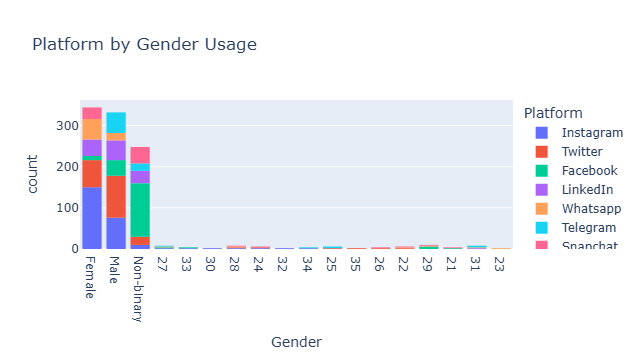

In [38]:
plt = px.histogram(train_df, x='Gender', color='Platform', title='Platform by Gender Usage')
plt.show()

In [39]:
# grouping age with gender
grouped = train_df.groupby(['Age', 'Gender'])

# count the number of rows in each group
counts = grouped.size()

# print the counts  
print(counts)

Age   Gender    
21.0  Female        20
      Male          10
      Non-binary    26
22.0  Female        48
      Male           8
      Non-binary    18
23.0  Female        10
      Male           8
      Non-binary    30
24.0  Female        26
      Male          10
      Non-binary    28
25.0  Female        40
      Male          24
26.0  Female         8
      Male          28
      Non-binary    30
27.0  21             4
      22             6
      23             2
      24             6
      25             6
      26             4
      27             8
      28             8
      29            10
      30             2
      31             8
      32             2
      33             4
      34             4
      35             2
      Female        28
      Male          44
      Non-binary    20
28.0  Female        36
      Male          28
      Non-binary    28
29.0  Female        28
      Male          30
      Non-binary    32
30.0  Female         8
      Male       

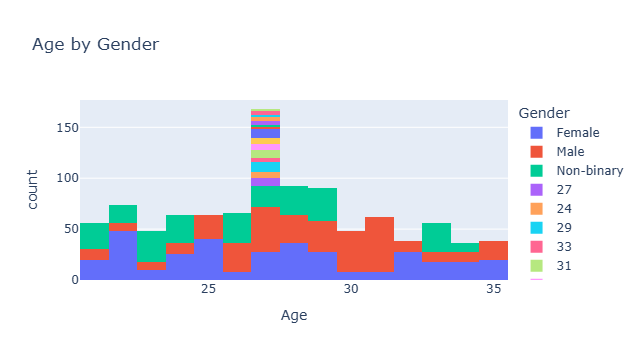

In [40]:
plt = px.histogram(train_df, x='Age', color='Gender', title='Age by Gender')
plt.show()

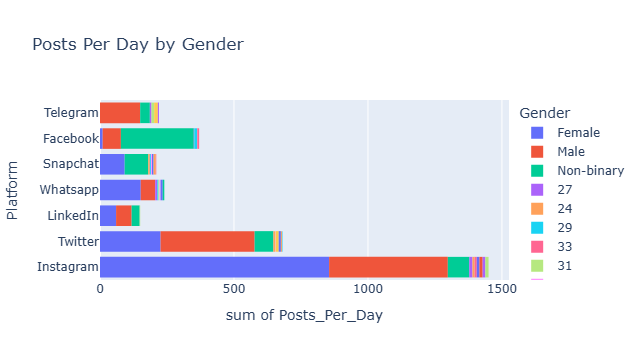

In [41]:
plt = px.histogram(train_df, x='Posts_Per_Day', y='Platform' ,color='Gender', title='Posts Per Day by Gender')
plt.show()

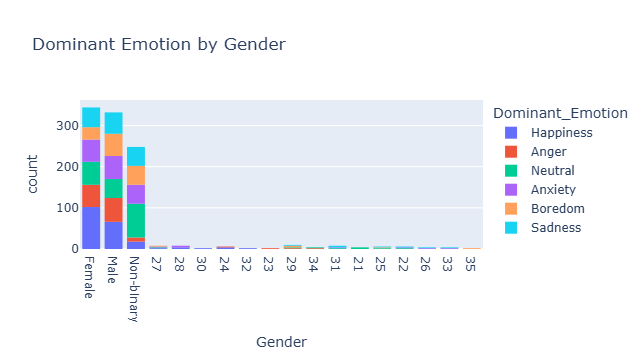

In [42]:
# ploting
plt = px.histogram(train_df, x='Gender', color='Dominant_Emotion', title='Dominant Emotion by Gender')
plt.show()

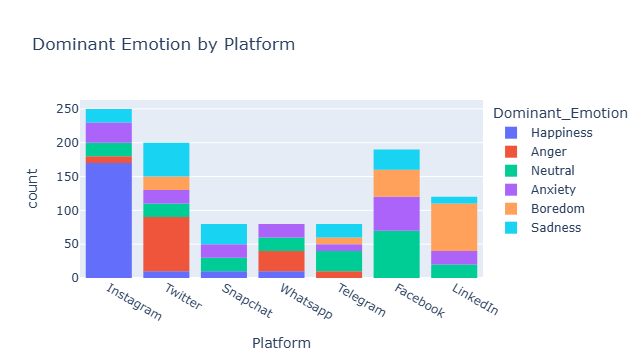

In [43]:
Plt = px.histogram(train_df, x='Platform', color='Dominant_Emotion', title='Dominant Emotion by Platform')
Plt.show()

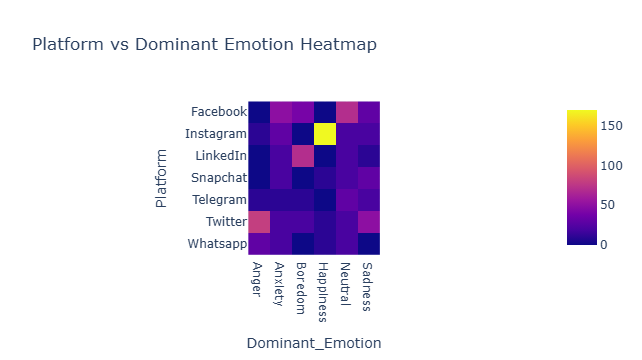

In [44]:
# Create a contingency table
contingency_table = pd.crosstab(train_df['Platform'], train_df['Dominant_Emotion'])

# Plot the heatmap
fig = px.imshow(contingency_table, title='Platform vs Dominant Emotion Heatmap')
fig.show()

In [4]:
# Display basic statistics
print("Train Dataset Statistics:")
display(train_df.describe())
print("Validation Dataset Statistics:")
display(val_df.describe())
print("Test Dataset Statistics:")
display(test_df.describe())

Train Dataset Statistics:


Daily_Usage_Time (minutes)  Posts_Per_Day  Likes_Received_Per_Day  \
count                 1000.000000    1000.000000             1000.000000   
mean                    95.950000       3.321000               39.898000   
std                     38.850442       1.914582               26.393867   
min                     40.000000       1.000000                5.000000   
25%                     65.000000       2.000000               20.000000   
50%                     85.000000       3.000000               33.000000   
75%                    120.000000       4.000000               55.000000   
max                    200.000000       8.000000              110.000000   

       Comments_Received_Per_Day  Messages_Sent_Per_Day  
count                1000.000000            1000.000000  
mean                   15.611000              22.560000  
std                     8.819493               8.516274  
min                     2.000000               8.000000  
25%                     8.000000              17.750000  
50%                    14.000000              22.000000  
75%                    22.000000              28.000000  
max                    40.000000              50.000000

Validation Dataset Statistics:


User_ID  Posts_Per_Day  Likes_Received_Per_Day  \
count  148.000000     148.000000              148.000000   
mean   483.891892       4.972973               38.777027   
std    283.908775      17.100323               26.514743   
min      5.000000       1.000000                2.000000   
25%    232.250000       2.000000               20.000000   
50%    469.000000       3.000000               33.000000   
75%    736.000000       5.000000               50.000000   
max    986.000000     210.000000              110.000000   

       Comments_Received_Per_Day  
count                 148.000000  
mean                   15.527027  
std                    10.138125  
min                     2.000000  
25%                     8.000000  
50%                    14.000000  
75%                    20.000000  
max                    87.000000

Test Dataset Statistics:


User_ID  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  103.000000                  103.000000     103.000000   
mean   521.262136                   88.009709       2.864078   
std    288.949991                   33.979087       1.732326   
min     16.000000                   40.000000       1.000000   
25%    275.000000                   60.000000       1.000000   
50%    526.000000                   75.000000       2.000000   
75%    776.000000                  105.000000       4.000000   
max    997.000000                  200.000000       8.000000   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count              103.000000                 103.000000   
mean                33.456311                  13.766990   
std                 23.031426                   8.107372   
min                  5.000000                   2.000000   
25%                 15.000000                   7.000000   
50%                 27.000000                  12.000000   
75%                 40.000000                  19.500000   
max                110.000000                  40.000000   

       Messages_Sent_Per_Day  
count             103.000000  
mean               20.388350  
std                 7.372755  
min                10.000000  
25%                15.000000  
50%                20.000000  
75%                25.000000  
max                45.000000

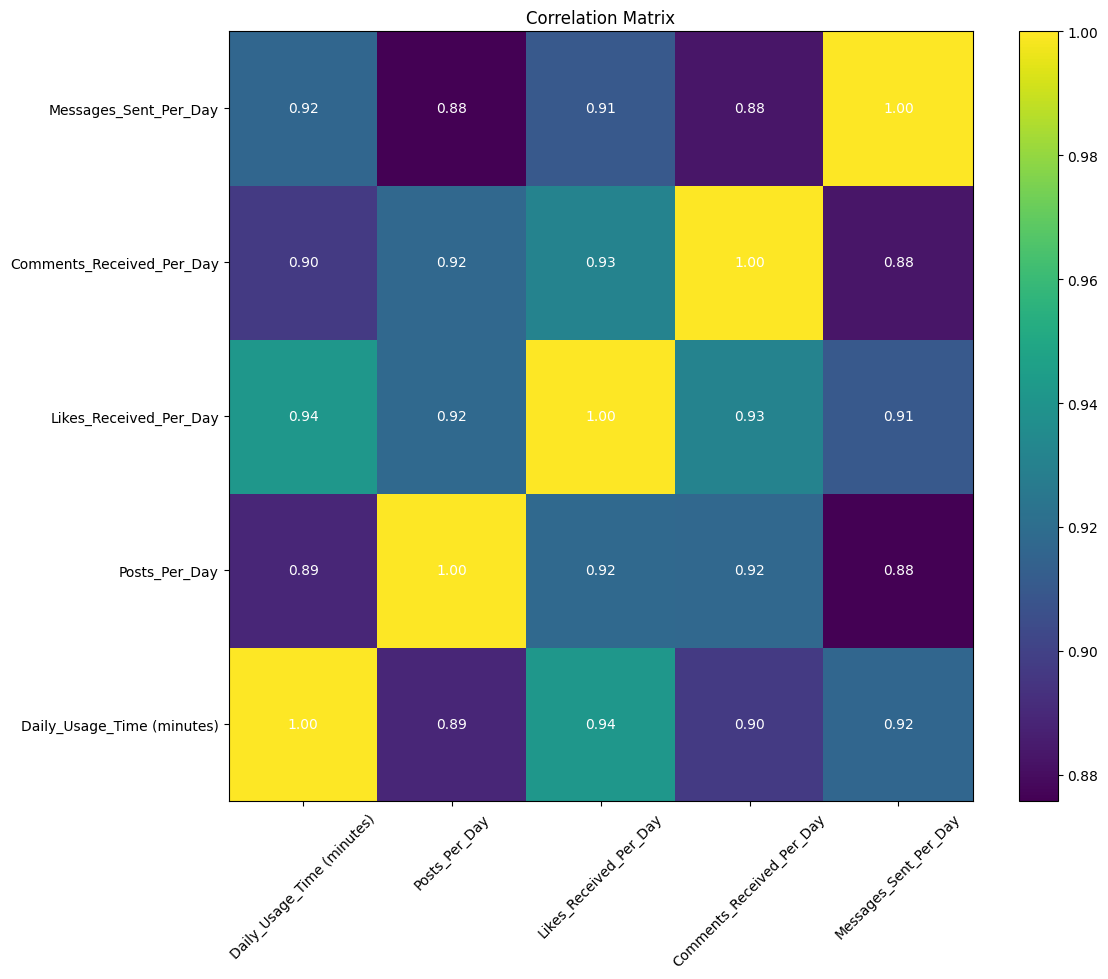

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix using only numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Ensure all columns are numeric and drop any rows with NaN values that might remain
numeric_train_df = numeric_train_df.dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_train_df.corr()

# Plot the correlation matrix with annotations using matplotlib directly
plt.figure(figsize=(12, 10))
heatmap = plt.pcolor(correlation_matrix, cmap='viridis')

plt.colorbar(heatmap)
plt.xticks(np.arange(0.5, len(correlation_matrix.columns), 1), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(0.5, len(correlation_matrix.index), 1), correlation_matrix.index)

# Adding annotations
for y in range(correlation_matrix.shape[0]):
    for x in range(correlation_matrix.shape[1]):
        plt.text(x + 0.5, y + 0.5, f'{correlation_matrix.iloc[y, x]:.2f}',
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='white')

plt.title('Correlation Matrix')
plt.show()

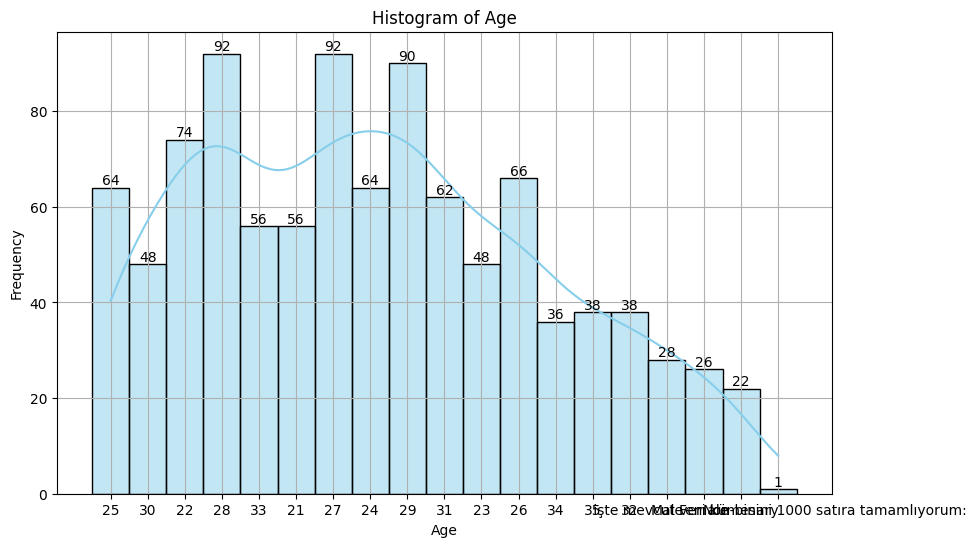

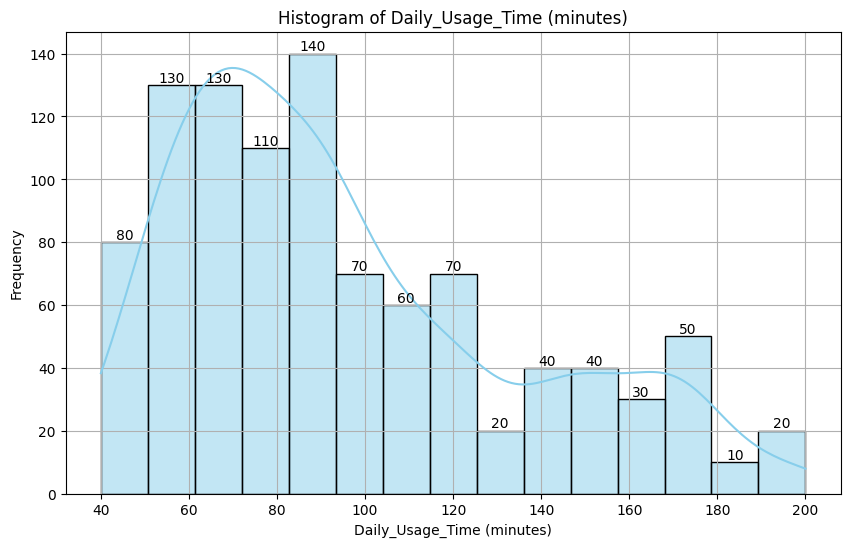

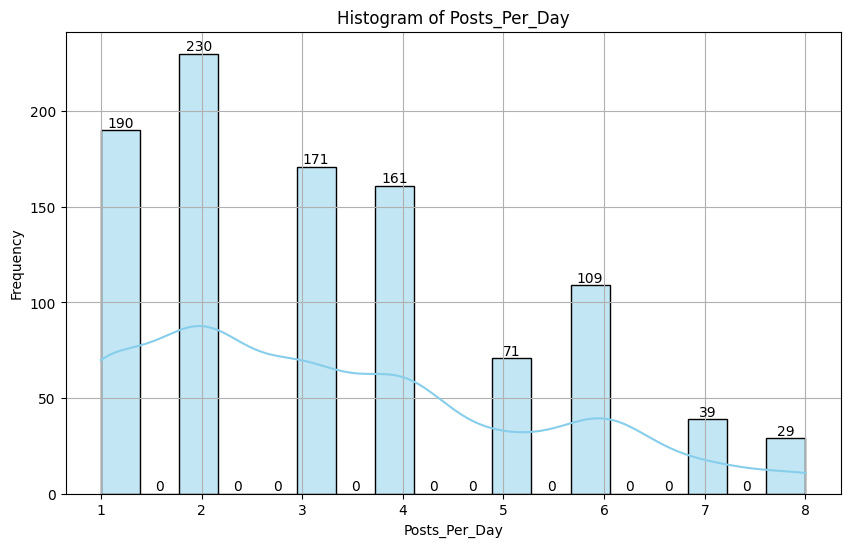

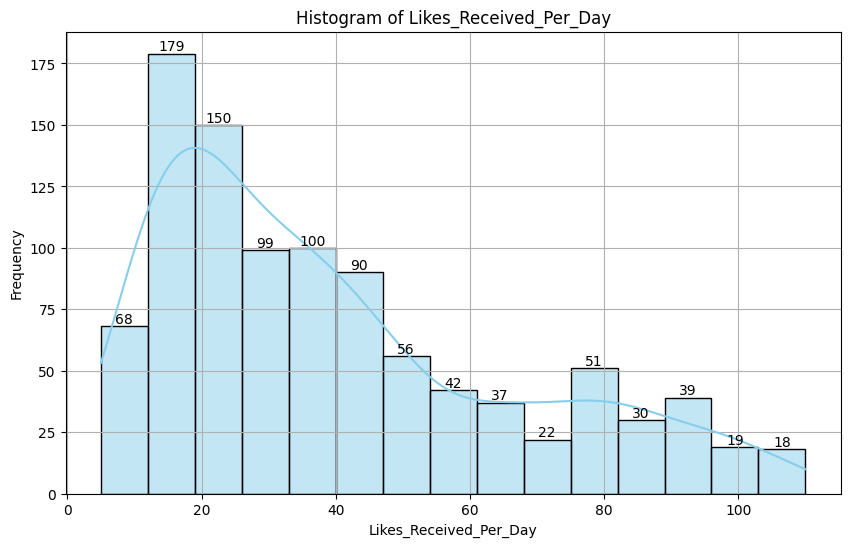

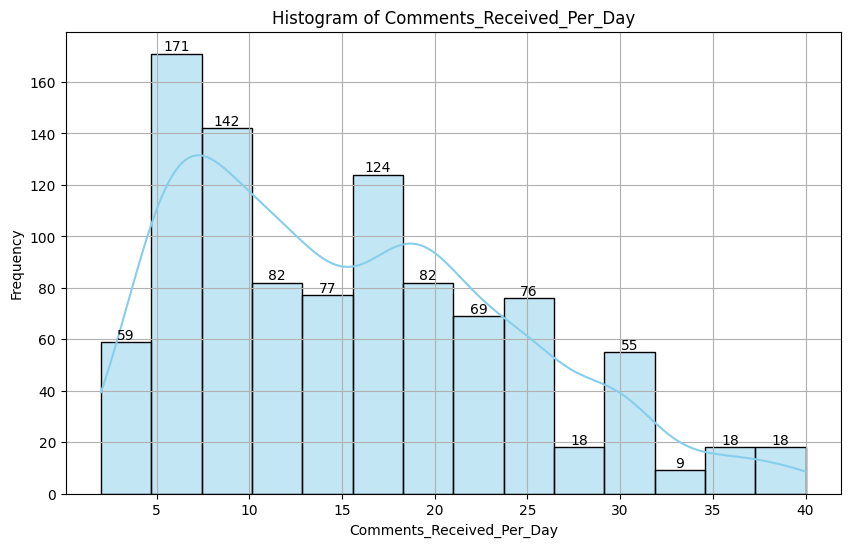

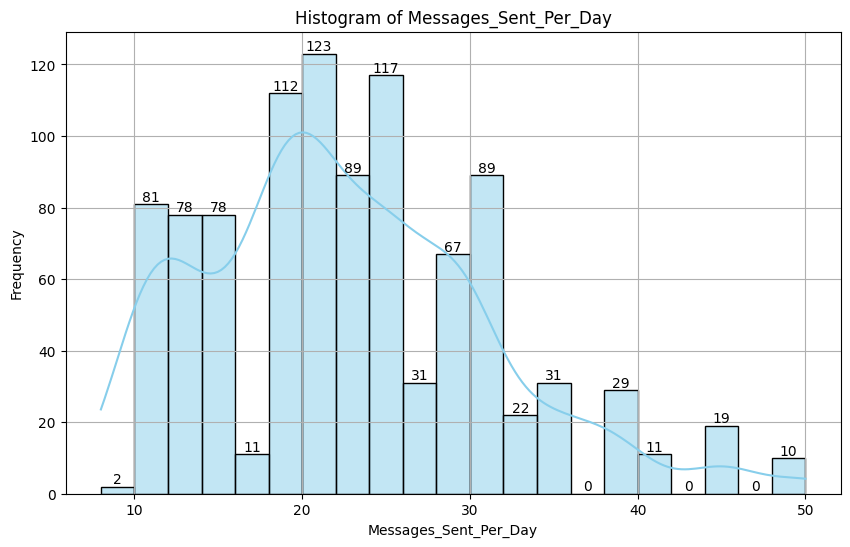

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')


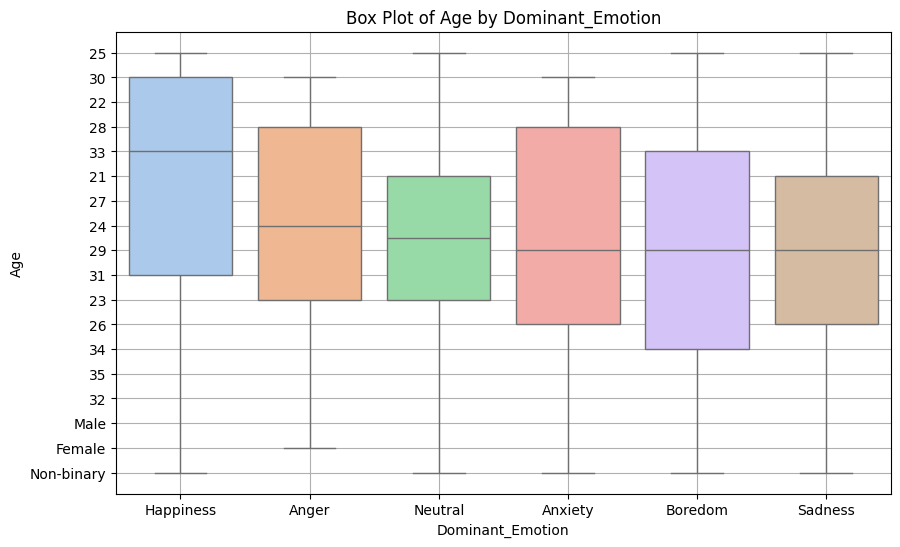

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')


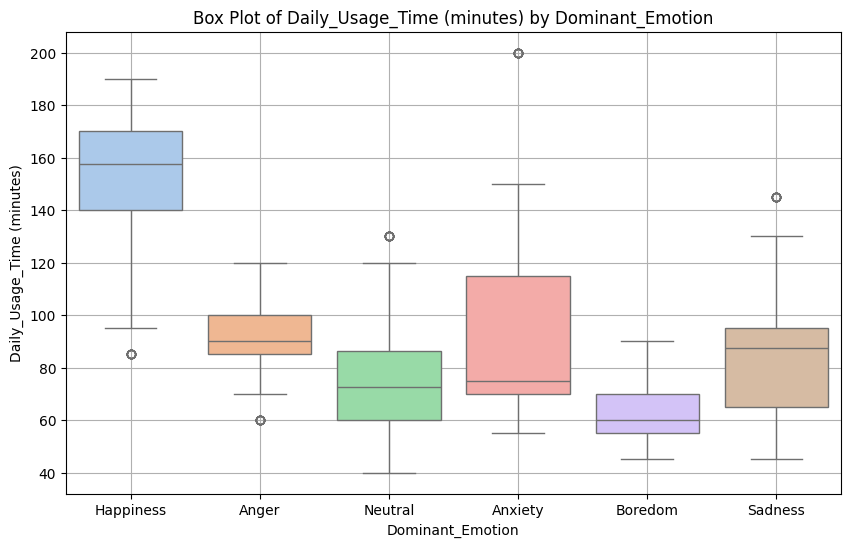

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')


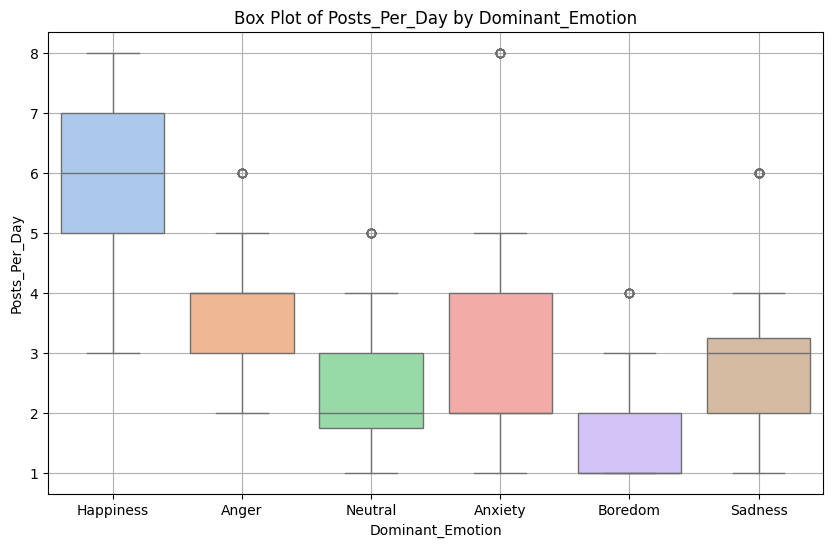

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')


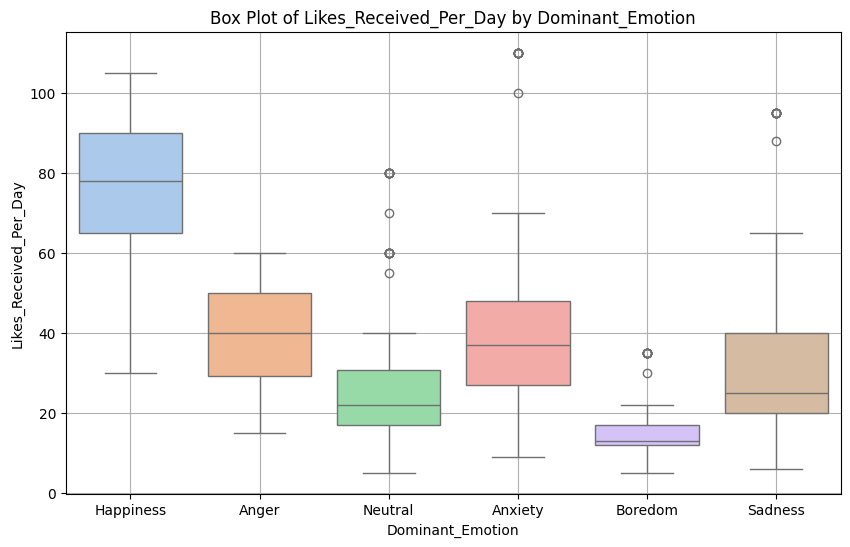

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')


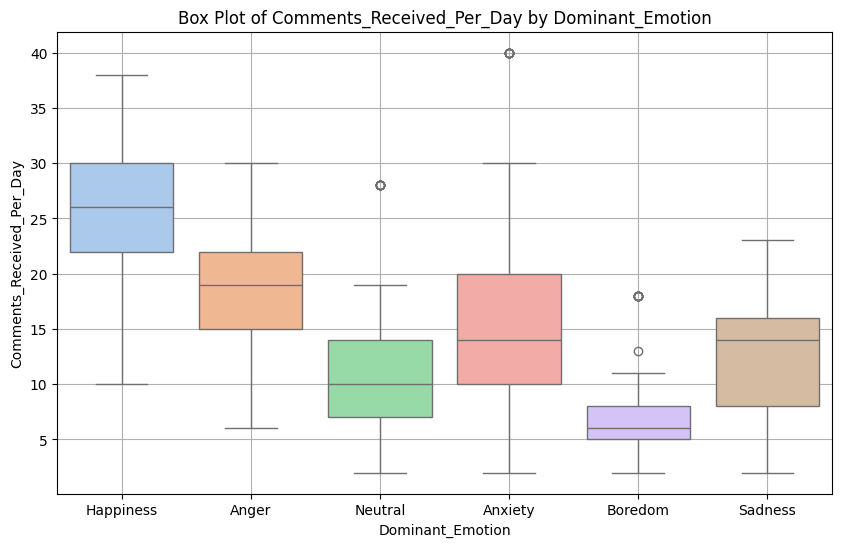

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')


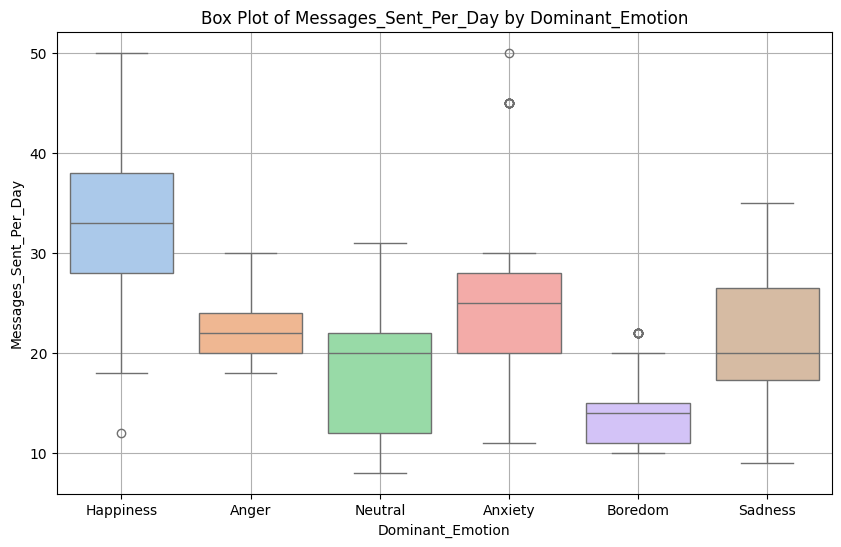

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")


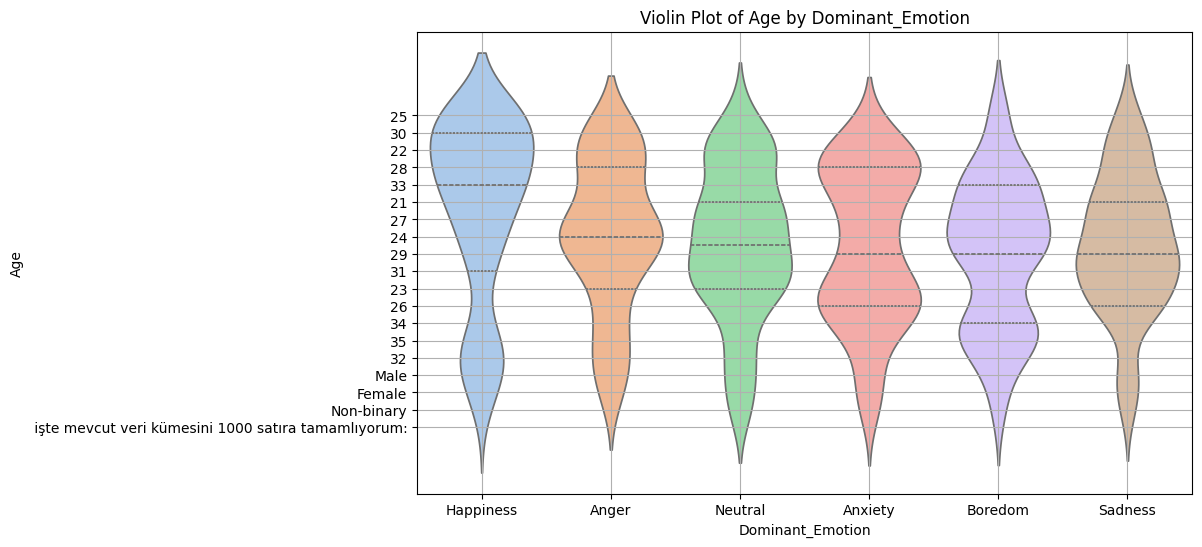

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")


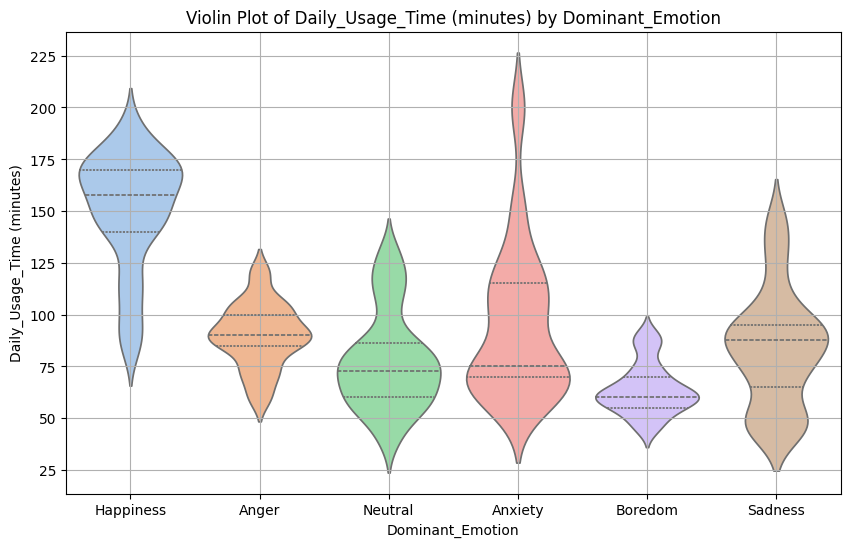

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")


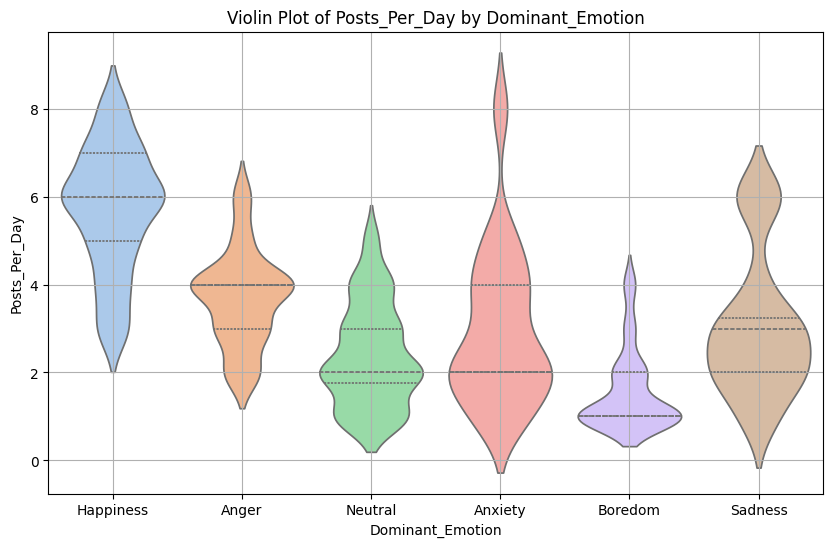

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")


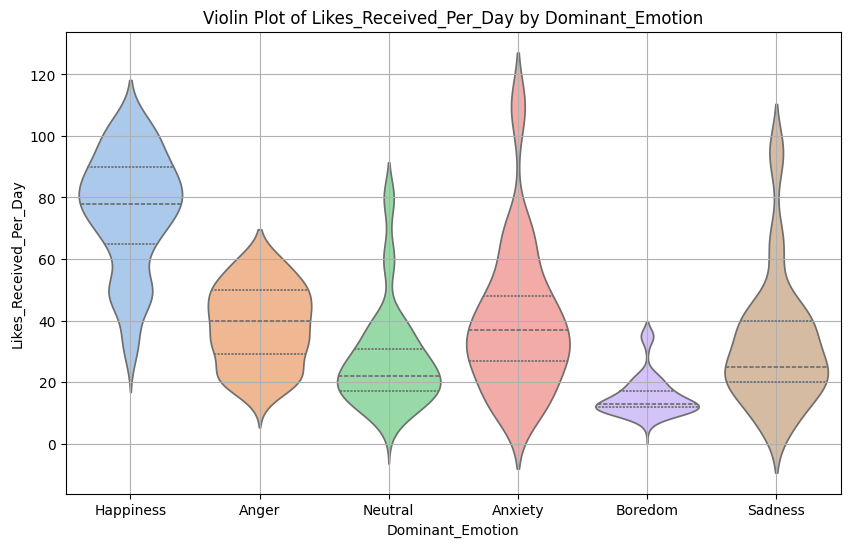

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")


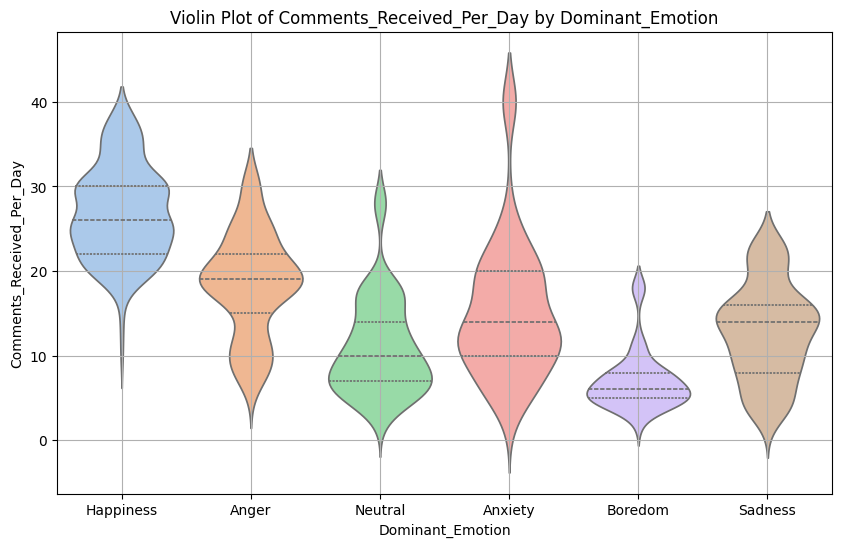

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\2729558857.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")


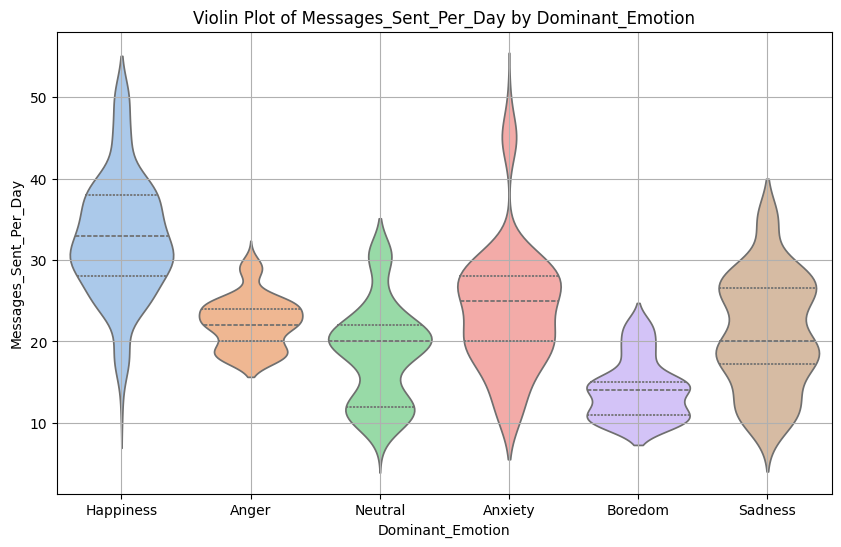

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day' \
                   , 'Comments_Received_Per_Day','Messages_Sent_Per_Day']

# Plotting histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.histplot(train_df[var].dropna(), kde=True, color = 'skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt='%d')
    plt.show()

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel')
    plt.title(f'Box Plot of {var} by Dominant_Emotion')
    plt.xlabel('Dominant_Emotion')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()
    
# Violin plot for continuous variables vs Exited
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=train_df, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")
    plt.title(f'Violin Plot of {var} by Dominant_Emotion')
    plt.xlabel('Dominant_Emotion')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

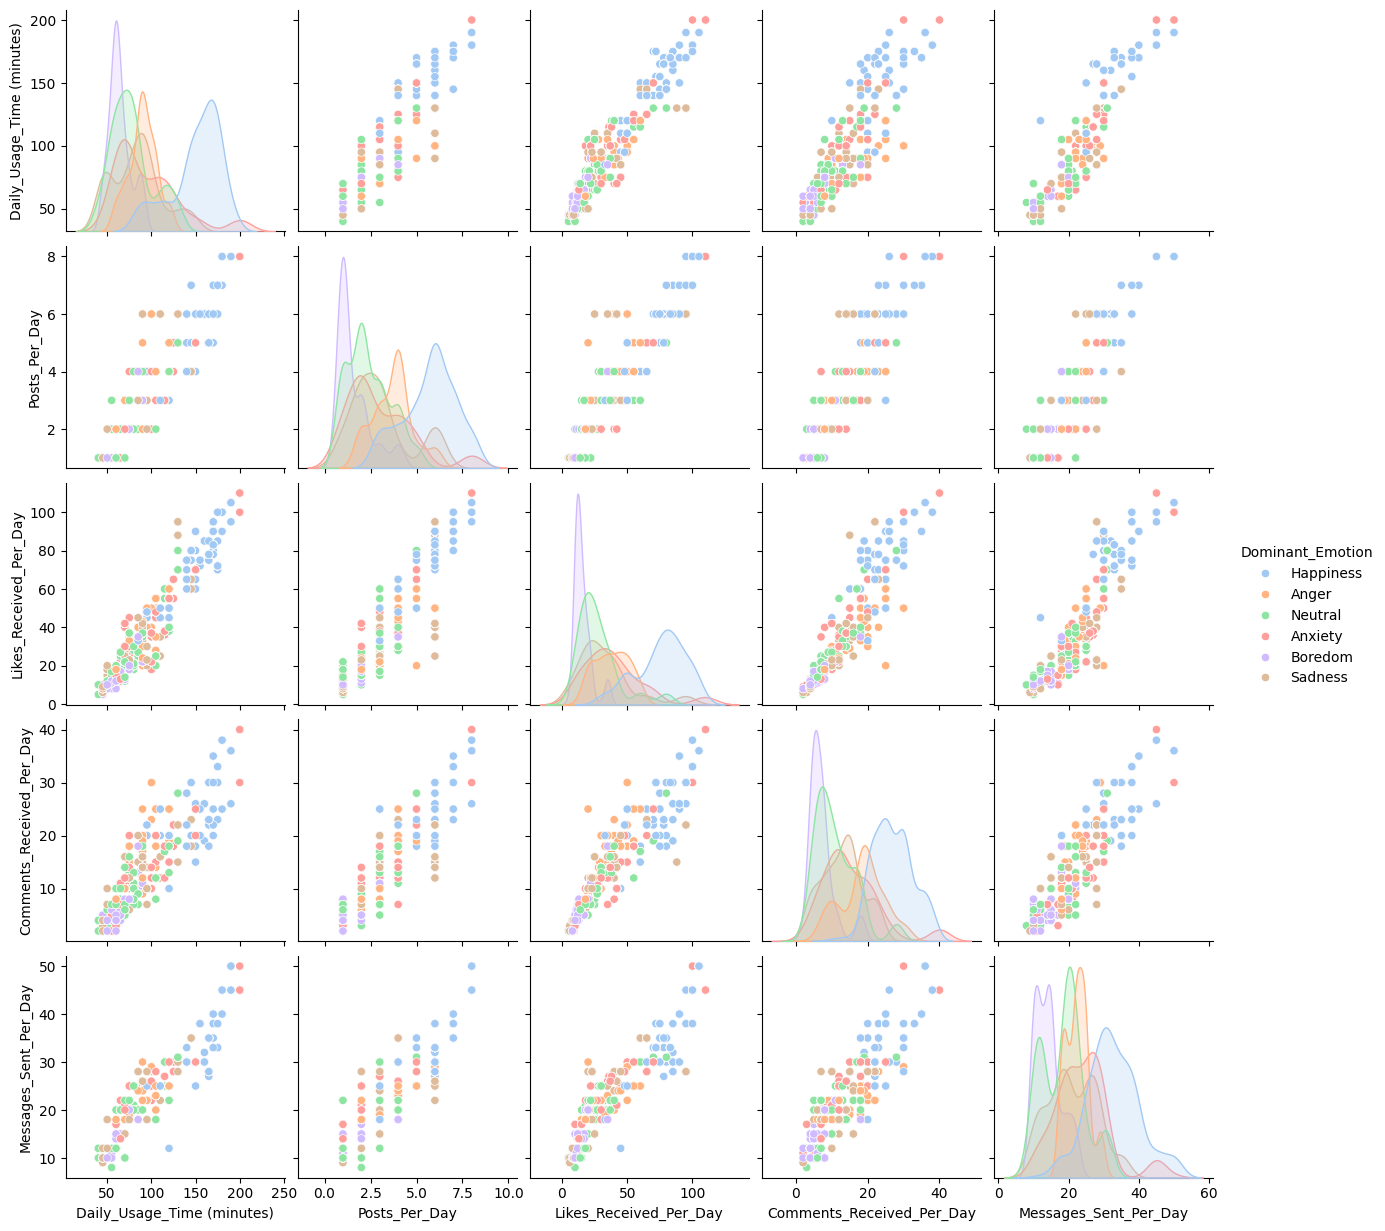

In [11]:
sns.pairplot(train_df[continuous_vars + ['Dominant_Emotion']], hue='Dominant_Emotion', palette='pastel', diag_kind='kde')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\3184949588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_df, x=var, palette='pastel')


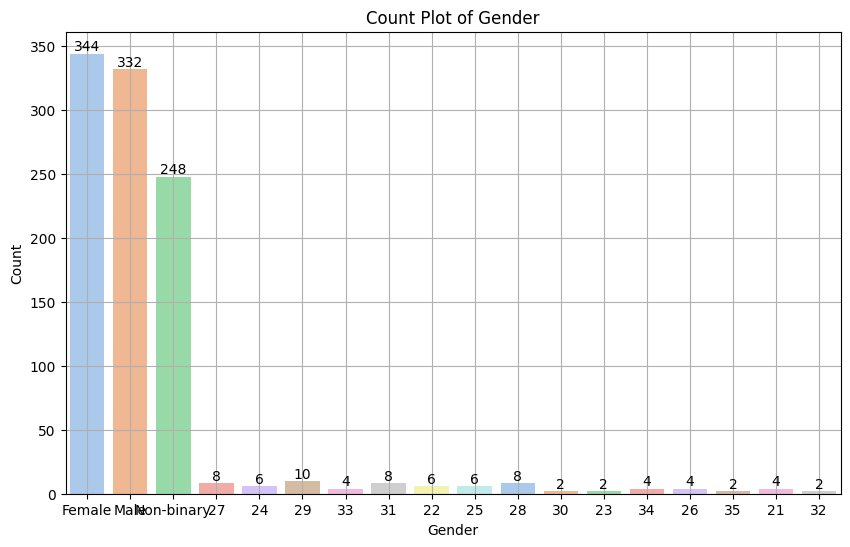

C:\Users\admin\AppData\Local\Temp\ipykernel_17044\3184949588.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_df, x=var, palette='pastel')


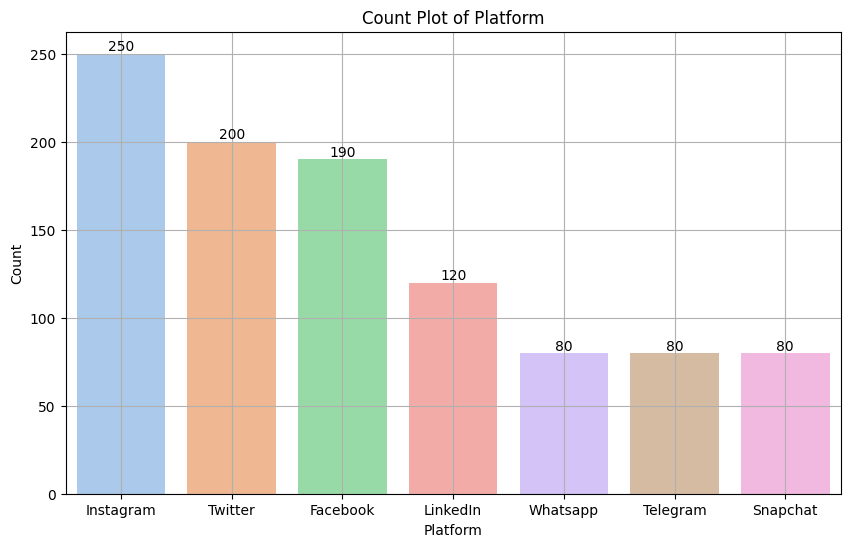

In [13]:
# List of categorical variables
categorical_vars = ['Gender', 'Platform']

# Plotting count plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=train_df, x=var, palette='pastel')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%d')
    plt.show()

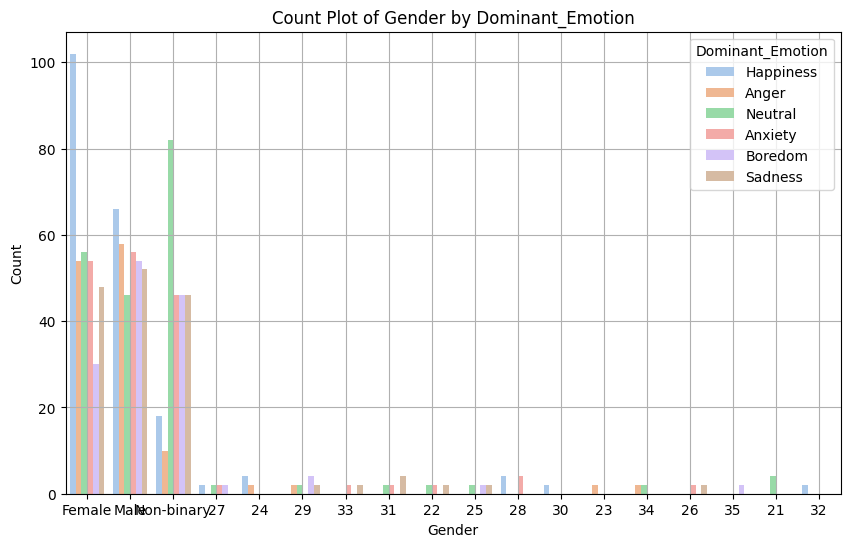

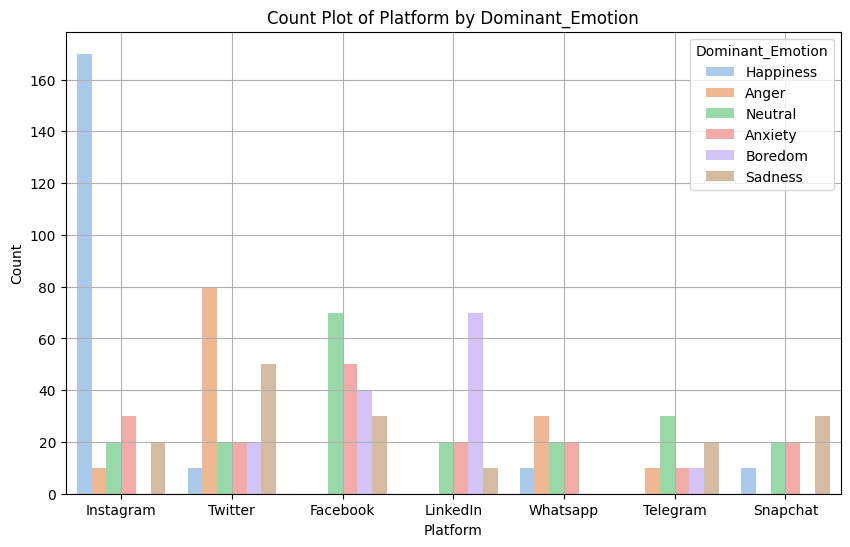

In [14]:
# Plotting count plots for categorical variables vs Exited
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_df, x=var, hue='Dominant_Emotion', palette='pastel')
    plt.title(f'Count Plot of {var} by Dominant_Emotion')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

## Correlation Analysis

Non-numeric columns in the dataset: Index(['Gender', 'Platform', 'Dominant_Emotion'], dtype='object')


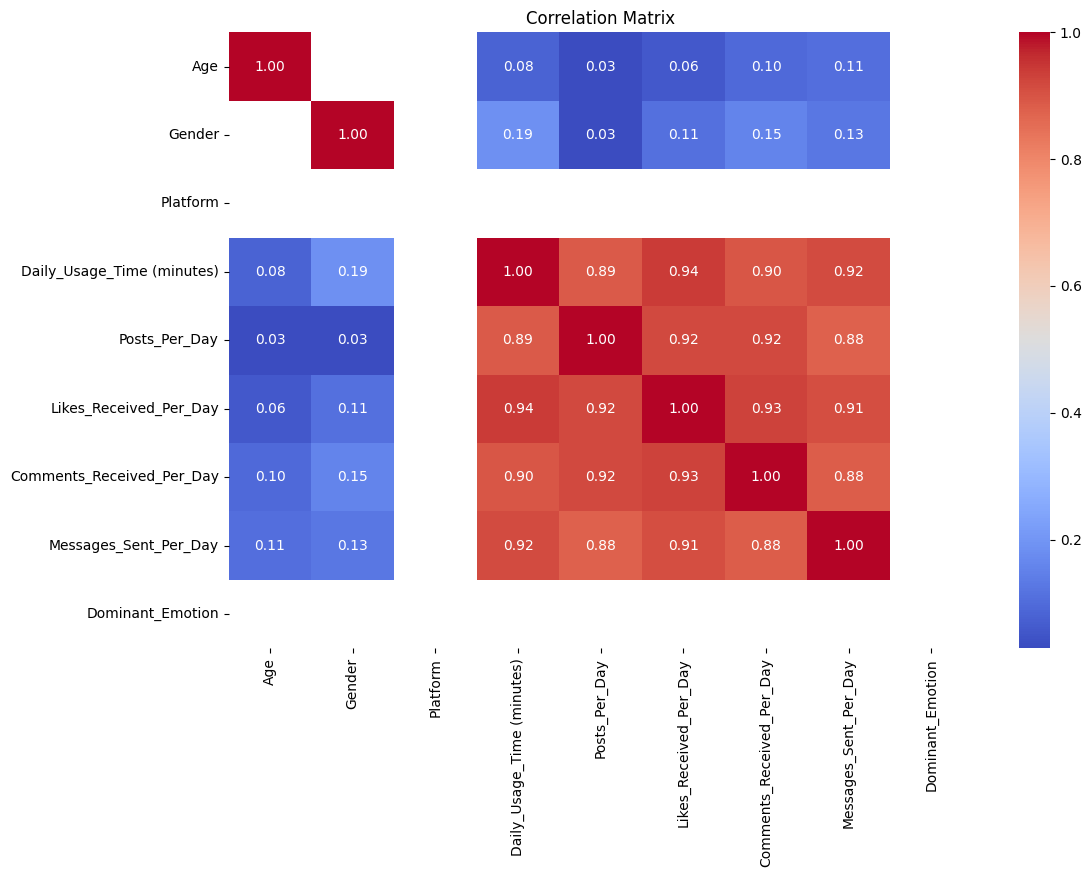

In [19]:
# Convert Age column to numeric
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce')

# Drop the User_ID column as it's not needed for correlation analysis
train_df_corr = train_df.drop(columns=['User_ID'])

# Check for any remaining non-numeric columns
non_numeric_columns = train_df_corr.select_dtypes(exclude=['number']).columns
print("Non-numeric columns in the dataset:", non_numeric_columns)

# Convert non-numeric columns to numeric using LabelEncoder if needed
# Note: We already applied LabelEncoder to these columns during preprocessing,
# so they should all be numeric now. This check is just a safety measure.
for column in non_numeric_columns:
    train_df_corr[column] = pd.to_numeric(train_df_corr[column], errors='coerce')

# Correlation Analysis
correlation_matrix = train_df_corr.corr()

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
